# Aula 03 - Python

Nesta aula veremos: 
1. Numpy Arrays e Pandas Dataframes
2. Open and export files
3. Conditional Statements
4. Loops em Python
5. Functions - DEF

## 1.1. Numpy Arrays

In [9]:
import numpy as np

#Criando um vetor de dados aleatórios
data = np.random.rand(1000,2)

#Verificando o tamanho do vetor
print(data.shape)
print(np.size(data))

#Print de uma amostra de dados
print(data[0:10])
print(data[0:10].shape)

(1000, 2)
2000
[[0.37803046 0.81664076]
 [0.32196763 0.13294437]
 [0.79814598 0.01645555]
 [0.91020091 0.52123712]
 [0.45514293 0.54254644]
 [0.99485217 0.5682278 ]
 [0.2349011  0.00448886]
 [0.23398967 0.65107181]
 [0.08110829 0.71755805]
 [0.33338467 0.19079522]]
(10, 2)


In [10]:
# Usando Monte-Carlo
dataMax = 1000
dataMin = 10
data = (dataMax - dataMin)*data + dataMin
print(data[0:10])

[[384.25015698 818.47434838]
 [328.74795033 141.61492575]
 [800.1645212   26.29099095]
 [911.0989044  526.02475055]
 [460.5914973  547.12097497]
 [994.90364338 572.54552607]
 [242.55209105  14.44396842]
 [241.64977472 654.56109086]
 [ 90.29720463 720.38247424]
 [340.05082396 198.88726527]]


<class 'numpy.ndarray'>


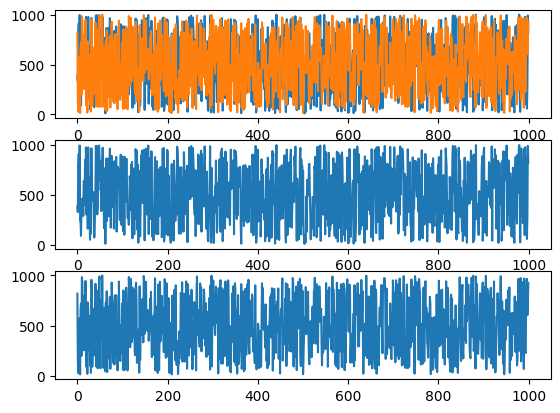

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3)
ax[0].plot(data)
ax[1].plot(data[:,0])
ax[2].plot(data[:,1])
print(type(data))

In [12]:
# Criando um dado 2D
data3d = np.sin(np.random.rand(1000,1000))
print(data3d)

[[0.73061682 0.57878076 0.7394112  ... 0.01303326 0.10513915 0.30055307]
 [0.71019028 0.5102265  0.45474138 ... 0.54205798 0.54881651 0.62719028]
 [0.36542844 0.56492376 0.72408848 ... 0.16607446 0.63573981 0.09737667]
 ...
 [0.6915977  0.01760423 0.58796437 ... 0.00719037 0.83032962 0.35677085]
 [0.66949329 0.62695826 0.15108376 ... 0.55678049 0.39316522 0.37161412]
 [0.4793314  0.0491979  0.36173158 ... 0.83208295 0.48836811 0.45450562]]


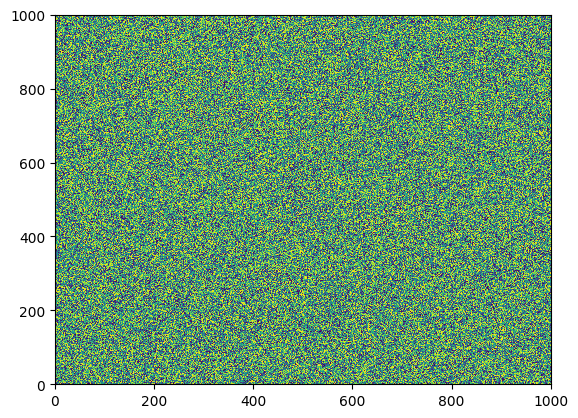

In [13]:
# Plotando um dado 3D
fig2, ax2 = plt.subplots()
ax2.pcolor(data3d)

In [14]:
# Criando vertor temporal
dtime = np.arange(np.datetime64("2022-01-01"), np.datetime64("2023-01-01"), np.timedelta64(1, "h"))
print(dtime[1:10])
print(dtime.shape)
print(type(dtime))

['2022-01-01T01' '2022-01-01T02' '2022-01-01T03' '2022-01-01T04'
 '2022-01-01T05' '2022-01-01T06' '2022-01-01T07' '2022-01-01T08'
 '2022-01-01T09']
(8760,)
<class 'numpy.ndarray'>


In [15]:
#NESTA ETAPA ANTERIOR, FIZEMOS

## PANDAS

In [16]:
import pandas as pd

# Criando um dataframe
df = pd.DataFrame()

In [17]:
# Monstrando um dataframe
df['datetime'] = dtime

In [18]:
# Criando uma coluna random dentro do dataframe df
df['random'] = np.random.rand(df.shape[0])

In [19]:
df['random'][1:10]

1    0.298270
2    0.217894
3    0.572724
4    0.925246
5    0.223849
6    0.145636
7    0.731262
8    0.510726
9    0.810088
Name: random, dtype: float64

In [20]:
# Indexação
df.iloc[:,0]

0      2022-01-01 00:00:00
1      2022-01-01 01:00:00
2      2022-01-01 02:00:00
3      2022-01-01 03:00:00
4      2022-01-01 04:00:00
               ...        
8755   2022-12-31 19:00:00
8756   2022-12-31 20:00:00
8757   2022-12-31 21:00:00
8758   2022-12-31 22:00:00
8759   2022-12-31 23:00:00
Name: datetime, Length: 8760, dtype: datetime64[s]

In [21]:
# Colocando o datetime como index
df = df.set_index(df['datetime'])
df

,datetime,random
datetime,,
2022-01-01 00:00:00,2022-01-01 00:00:00,0.464678
2022-01-01 01:00:00,2022-01-01 01:00:00,0.298270
2022-01-01 02:00:00,2022-01-01 02:00:00,0.217894
2022-01-01 03:00:00,2022-01-01 03:00:00,0.572724
2022-01-01 04:00:00,2022-01-01 04:00:00,0.925246
...,...,...
2022-12-31 19:00:00,2022-12-31 19:00:00,0.522790
2022-12-31 20:00:00,2022-12-31 20:00:00,0.540288
2022-12-31 21:00:00,2022-12-31 21:00:00,0.343435


In [22]:
# Criando colunas com ano, mês e dia
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day

(8760,)


<Axes: xlabel='datetime'>

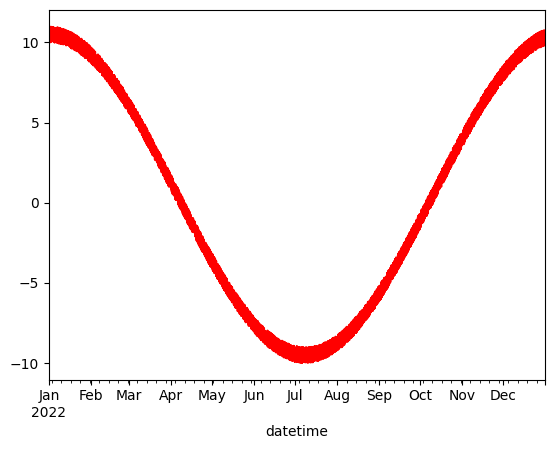

In [23]:
tt = np.arange(0,df.shape[0],1)
print(tt.shape)
df['sazonal'] = (np.cos(tt/(360*4)))
df['timeSeries'] = 10*df['sazonal']+df['random']
#df['sazonal'].plot()
df['timeSeries'].plot(color='red')

In [24]:
df

,datetime,random,year,month,day,sazonal,timeSeries
datetime,,,,,,,
2022-01-01 00:00:00,2022-01-01 00:00:00,0.464678,2022,1,1,1.000000,10.464678
2022-01-01 01:00:00,2022-01-01 01:00:00,0.298270,2022,1,1,1.000000,10.298268
2022-01-01 02:00:00,2022-01-01 02:00:00,0.217894,2022,1,1,0.999999,10.217884
2022-01-01 03:00:00,2022-01-01 03:00:00,0.572724,2022,1,1,0.999998,10.572703
2022-01-01 04:00:00,2022-01-01 04:00:00,0.925246,2022,1,1,0.999996,10.925208
...,...,...,...,...,...,...,...
2022-12-31 19:00:00,2022-12-31 19:00:00,0.522790,2022,12,31,0.979401,10.316797
2022-12-31 20:00:00,2022-12-31 20:00:00,0.540288,2022,12,31,0.979541,10.335695
2022-12-31 21:00:00,2022-12-31 21:00:00,0.343435,2022,12,31,0.979680,10.140238


In [26]:
# Salvar meu dataframe
df.to_csv(r"C:\Users\Acer\Desktop\ENS5173_Barbara\ENS5173_Barbara\dados\brutos\noise_2022.csv")

In [30]:
# Criando uma função
def noiseCreation(path, year):
    """Esta função cria um ruido com sazonalidade.
    Inputs:
        path = asdasdas
        year = asdasdasdas
    """
# Criando um dataframe
    df = pd.DataFrame()
    
    # Criando vertor temporal
    dtime = np.arange(np.datetime64(str(year)+"-01-01"), np.datetime64(str(year+1)+"-01-01"), np.timedelta64(1, "h"))
    
    # Monstrando um dataframe
    df['datetime'] = dtime
        
    # Datetime como index do dataframe
    df = df.set_index(df['datetime'])
    
    # Criando colunas com ano, mês e dia
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    
    # Crio uma coluna random
    df['random'] = np.random.rand(df.shape[0])
    
    # Adicionar sazonalidade
    tt = np.arange(0,df.shape[0],1)
    print(tt.shape)
    df['sazonal'] = (np.cos(tt/(360*4)))
    df['timeSeries'] = 10*df['sazonal']+df['random']
    #df['sazonal'].plot()
    df['timeSeries'].plot(color='red')
    df.to_csv(path+'/noise_'+str(year)+'.csv')
    
    return df

(8760,)


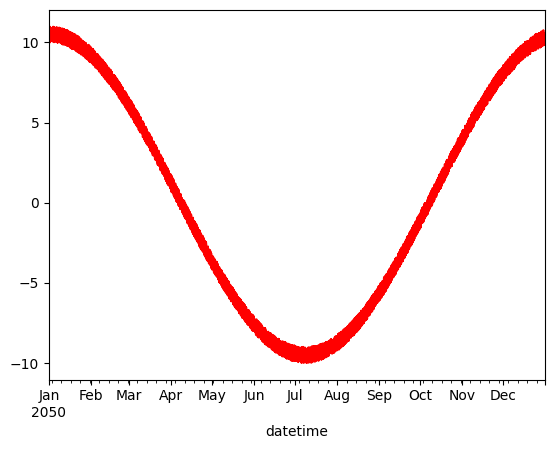

In [32]:
path = 'C:/Users/Acer/Desktop/ENS5173_Barbara/ENS5173_Barbara/dados/brutos'
df2 = noiseCreation(path,2050)

2002
(8760,)
2003
(8760,)
2004
(8784,)
2005
(8760,)
2006
(8760,)
2007
(8760,)
2008
(8784,)
2009
(8760,)


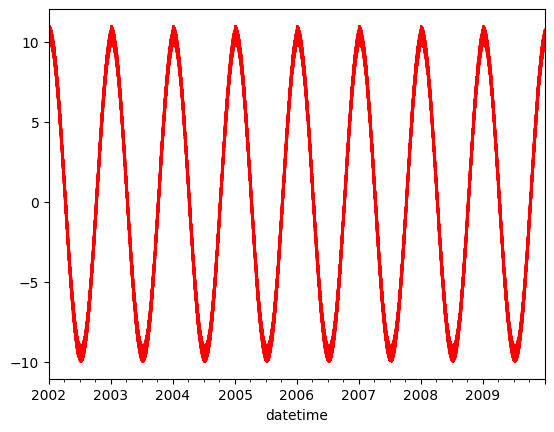

In [33]:
# Primeira opção de loop
for ii in range(2002,2010):
    print(ii)
    df = noiseCreation(path,ii)

In [34]:
df

,datetime,year,month,day,random,sazonal,timeSeries
datetime,,,,,,,
2009-01-01 00:00:00,2009-01-01 00:00:00,2009,1,1,0.545761,1.000000,10.545761
2009-01-01 01:00:00,2009-01-01 01:00:00,2009,1,1,0.882048,1.000000,10.882046
2009-01-01 02:00:00,2009-01-01 02:00:00,2009,1,1,0.428118,0.999999,10.428108
2009-01-01 03:00:00,2009-01-01 03:00:00,2009,1,1,0.115552,0.999998,10.115530
2009-01-01 04:00:00,2009-01-01 04:00:00,2009,1,1,0.016942,0.999996,10.016903
...,...,...,...,...,...,...,...
2009-12-31 19:00:00,2009-12-31 19:00:00,2009,12,31,0.244886,0.979401,10.038893
2009-12-31 20:00:00,2009-12-31 20:00:00,2009,12,31,0.461682,0.979541,10.257089
2009-12-31 21:00:00,2009-12-31 21:00:00,2009,12,31,0.722702,0.979680,10.519505


2001
2030
2032
(8784,)
2053
(8760,)
2060
(8784,)


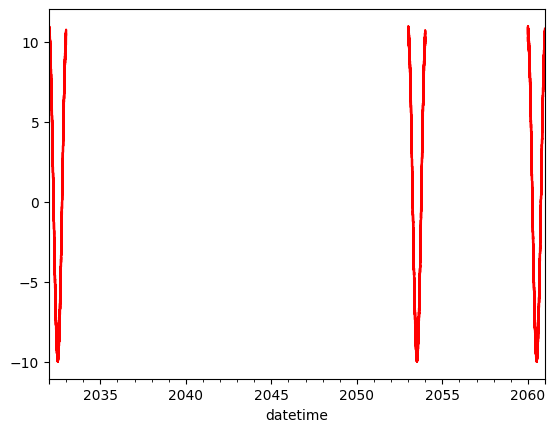

In [35]:
anos = [2001,2030,2032,2053,2060]

for ano in anos:
    print(ano)
    if ano > 2030:
        df = noiseCreation(path,ano)

In [36]:
import os
files = os.listdir(path)
print(files)

allData = []
for file in files:
    if file.endswith('.csv'):
        print(file)
        data = pd.read_csv(path+'/'+file)
        allData.append(data)

['noise_2002.csv', 'noise_2003.csv', 'noise_2004.csv', 'noise_2005.csv', 'noise_2006.csv', 'noise_2007.csv', 'noise_2008.csv', 'noise_2009.csv', 'noise_2022.csv', 'noise_2032.csv', 'noise_2050.csv', 'noise_2053.csv', 'noise_2060.csv']
noise_2002.csv
noise_2003.csv
noise_2004.csv
noise_2005.csv
noise_2006.csv
noise_2007.csv
noise_2008.csv
noise_2009.csv
noise_2022.csv
noise_2032.csv
noise_2050.csv
noise_2053.csv
noise_2060.csv


In [37]:
allDataDf = pd.concat(allData)

In [38]:
allDataDf

,datetime,datetime.1,year,month,day,random,sazonal,timeSeries
0,2002-01-01 00:00:00,2002-01-01 00:00:00,2002,1,1,0.438240,1.000000,10.438240
1,2002-01-01 01:00:00,2002-01-01 01:00:00,2002,1,1,0.724916,1.000000,10.724914
2,2002-01-01 02:00:00,2002-01-01 02:00:00,2002,1,1,0.641982,0.999999,10.641972
3,2002-01-01 03:00:00,2002-01-01 03:00:00,2002,1,1,0.069686,0.999998,10.069665
4,2002-01-01 04:00:00,2002-01-01 04:00:00,2002,1,1,0.044768,0.999996,10.044729
...,...,...,...,...,...,...,...,...
8779,2060-12-31 19:00:00,2060-12-31 19:00:00,2060,12,31,0.107215,0.982630,9.933515
8780,2060-12-31 20:00:00,2060-12-31 20:00:00,2060,12,31,0.776439,0.982759,10.604026
8781,2060-12-31 21:00:00,2060-12-31 21:00:00,2060,12,31,0.963249,0.982887,10.792117
8782,2060-12-31 22:00:00,2060-12-31 22:00:00,2060,12,31,0.792150,0.983014,10.622295


In [ ]:
plt.plot(allDataDf['datetime'],allDataDf['timeSeries'])